In [48]:
import os
from dotenv import load_dotenv
import pandas as pd
import mysql.connector


# .env 파일 로드
load_dotenv()

# 환경 변수 읽기
DB_HOST = os.getenv("DB_HOST")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")
DB_SUER = os.getenv("DB_USER")

In [49]:
conn = mysql.connector.connect(
    host = DB_HOST,
    user = DB_SUER,
    password = DB_PASSWORD,
    database = DB_NAME
)   

cursor = conn.cursor(buffered=True)

# SQL 쿼리 실행 및 데이터 불러오기
query = """
    SELECT 
        report_date, 
        gastroenteritis 
    FROM 
        michelin.naver_trend_day
    WHERE 
        report_date BETWEEN '2019-01-01' AND '2024-12-31';
"""
df = pd.read_sql(query, conn)

# 연결 종료
conn.close()

df['report_date'] = pd.to_datetime(df['report_date'])  # 날짜 형식 변환
df['report_date'] = df['report_date'].dt.to_period('M')  # 년-월 추출


numeric_columns = df.select_dtypes(include=['number']).columns

ndf = df.groupby('report_date')[numeric_columns].sum()
ndf = ndf.reset_index()

/tmp/ipykernel_13683/4269235983.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [50]:
conn = mysql.connector.connect(
    host = DB_HOST,
    user = DB_SUER,
    password = DB_PASSWORD,
    database = DB_NAME
)   

cursor = conn.cursor(buffered=True)

# SQL 쿼리 실행 및 데이터 불러오기
query = """
    SELECT 
        report_date, 
        gastroenteritis 
    FROM 
        michelin.google_trend_day
    WHERE 
        report_date BETWEEN '2019-01-01' AND '2024-12-31';
"""
df = pd.read_sql(query, conn)

# 연결 종료
conn.close()

df['report_date'] = pd.to_datetime(df['report_date'])  # 날짜 형식 변환
df['report_date'] = df['report_date'].dt.to_period('M')  # 년-월 추출


numeric_columns = df.select_dtypes(include=['number']).columns

gdf = df.groupby('report_date')[numeric_columns].sum()
gdf = gdf.reset_index()

/tmp/ipykernel_13683/3604526402.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [51]:
conn = mysql.connector.connect(
    host = DB_HOST,
    user = DB_SUER,
    password = DB_PASSWORD,
    database = DB_NAME
)   

cursor = conn.cursor(buffered=True)

# SQL 쿼리 실행 및 데이터 불러오기
query = """
    SELECT 
        DATE_FORMAT(report_date, '%Y-%m') as report_date, 
        patient_count
    FROM 
        michelin.disease_age 
    where 
        age_group_10 = "계" and category = "장염";
"""
pdf = pd.read_sql(query, conn)

# 연결 종료
conn.close()
pdf = pdf.reset_index()

/tmp/ipykernel_13683/935485485.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pdf = pd.read_sql(query, conn)


In [52]:
conn = mysql.connector.connect(
    host = DB_HOST,
    user = DB_SUER,
    password = DB_PASSWORD,
    database = DB_NAME
)   

cursor = conn.cursor(buffered=True)

# SQL 쿼리 실행 및 데이터 불러오기
query = """
    SELECT 
        *
    FROM 
        michelin.weather_temperature
	WHERE
        report_date between "20190101" and "20240531"
    ORDER BY report_date ASC;
"""
df = pd.read_sql(query, conn)

# 연결 종료
conn.close()

df['report_date'] = pd.to_datetime(df['report_date'])  # 날짜 형식 변환
df['report_date'] = df['report_date'].dt.to_period('M')  # 년-월 추출


numeric_columns = df.select_dtypes(include=['number']).columns

tdf = df.groupby('report_date')[numeric_columns].mean()

tdf = tdf.reset_index()

/tmp/ipykernel_13683/2225397218.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [53]:
conn = mysql.connector.connect(
    host = DB_HOST,
    user = DB_SUER,
    password = DB_PASSWORD,
    database = DB_NAME
)   

cursor = conn.cursor(buffered=True)

# SQL 쿼리 실행 및 데이터 불러오기
query = """
    SELECT 
        report_date, SO2, CO, O3, NO2, PM10, PM25
    FROM 
        michelin.air_day
	WHERE
        report_date between "20190101" and "20240531"
    ORDER BY report_date ASC;
"""
df = pd.read_sql(query, conn)

# 연결 종료
conn.close()

df['report_date'] = pd.to_datetime(df['report_date'])  # 날짜 형식 변환
df['report_date'] = df['report_date'].dt.to_period('M')  # 년-월 추출


numeric_columns = df.select_dtypes(include=['number']).columns

adf = df.groupby('report_date')[numeric_columns].mean()

adf = adf.reset_index()

/tmp/ipykernel_13683/398512554.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [54]:
pdf.head()

,index,report_date,patient_count
0,0,2019-01,621383
1,1,2019-02,508037
2,2,2019-03,498579
3,3,2019-04,531783
4,4,2019-05,566035


In [55]:
ndf.head()

,report_date,gastroenteritis
0,2019-01,1647.5514
1,2019-02,1330.2296
2,2019-03,1121.5436
3,2019-04,1253.5569
4,2019-05,1403.0028


In [56]:
gdf.head()

,report_date,gastroenteritis
0,2019-01,1266
1,2019-02,1293
2,2019-03,1233
3,2019-04,1104
4,2019-05,1317


In [57]:
tdf.head()

,report_date,avg_temperature,max_temperature,min_temperature,temperature_range
0,2020-01,3.585958,8.114231,0.026186,8.088046
1,2020-02,4.385193,9.610953,-0.169168,9.780122
2,2020-03,8.473814,14.368121,2.929412,11.438710
3,2020-04,11.266208,17.335490,5.650588,11.684902
4,2020-05,17.984440,23.350095,13.433397,9.916698


In [58]:
adf.head()

,report_date,SO2,CO,O3,NO2,PM10,PM25
0,2019-01,0.004436,0.633725,0.019902,0.025402,57.886472,33.378267
1,2019-02,0.004086,0.590934,0.025685,0.023130,54.972767,33.007526
2,2019-03,0.003896,0.523891,0.036593,0.021202,60.632622,37.243478
3,2019-04,0.003746,0.425685,0.036154,0.018734,41.323641,19.536990
4,2019-05,0.004323,0.432272,0.049596,0.017932,48.940833,24.715463


In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_ndf = ndf.copy()
scaler_gdf = gdf.copy()
scaler_pdf = pdf.copy()

scaler_ndf['gastroenteritis'] = scaler.fit_transform(scaler_ndf[['gastroenteritis']])
scaler_gdf['gastroenteritis'] = scaler.fit_transform(scaler_gdf[['gastroenteritis']])

patient_count_scaled_range = (pdf['patient_count'].max() - pdf['patient_count'].min()) + pdf['patient_count'].min()

scaler_ndf['gastroenteritis'] = scaler_ndf['gastroenteritis'] * patient_count_scaled_range
scaler_gdf['gastroenteritis'] = scaler_gdf['gastroenteritis'] * patient_count_scaled_range

In [60]:
scaler_ndf = scaler_ndf.set_index("report_date")
scaler_pdf = scaler_pdf.set_index("report_date")
scaler_gdf = scaler_gdf.set_index("report_date")

# 네이버, 구글, 환자수 그래프

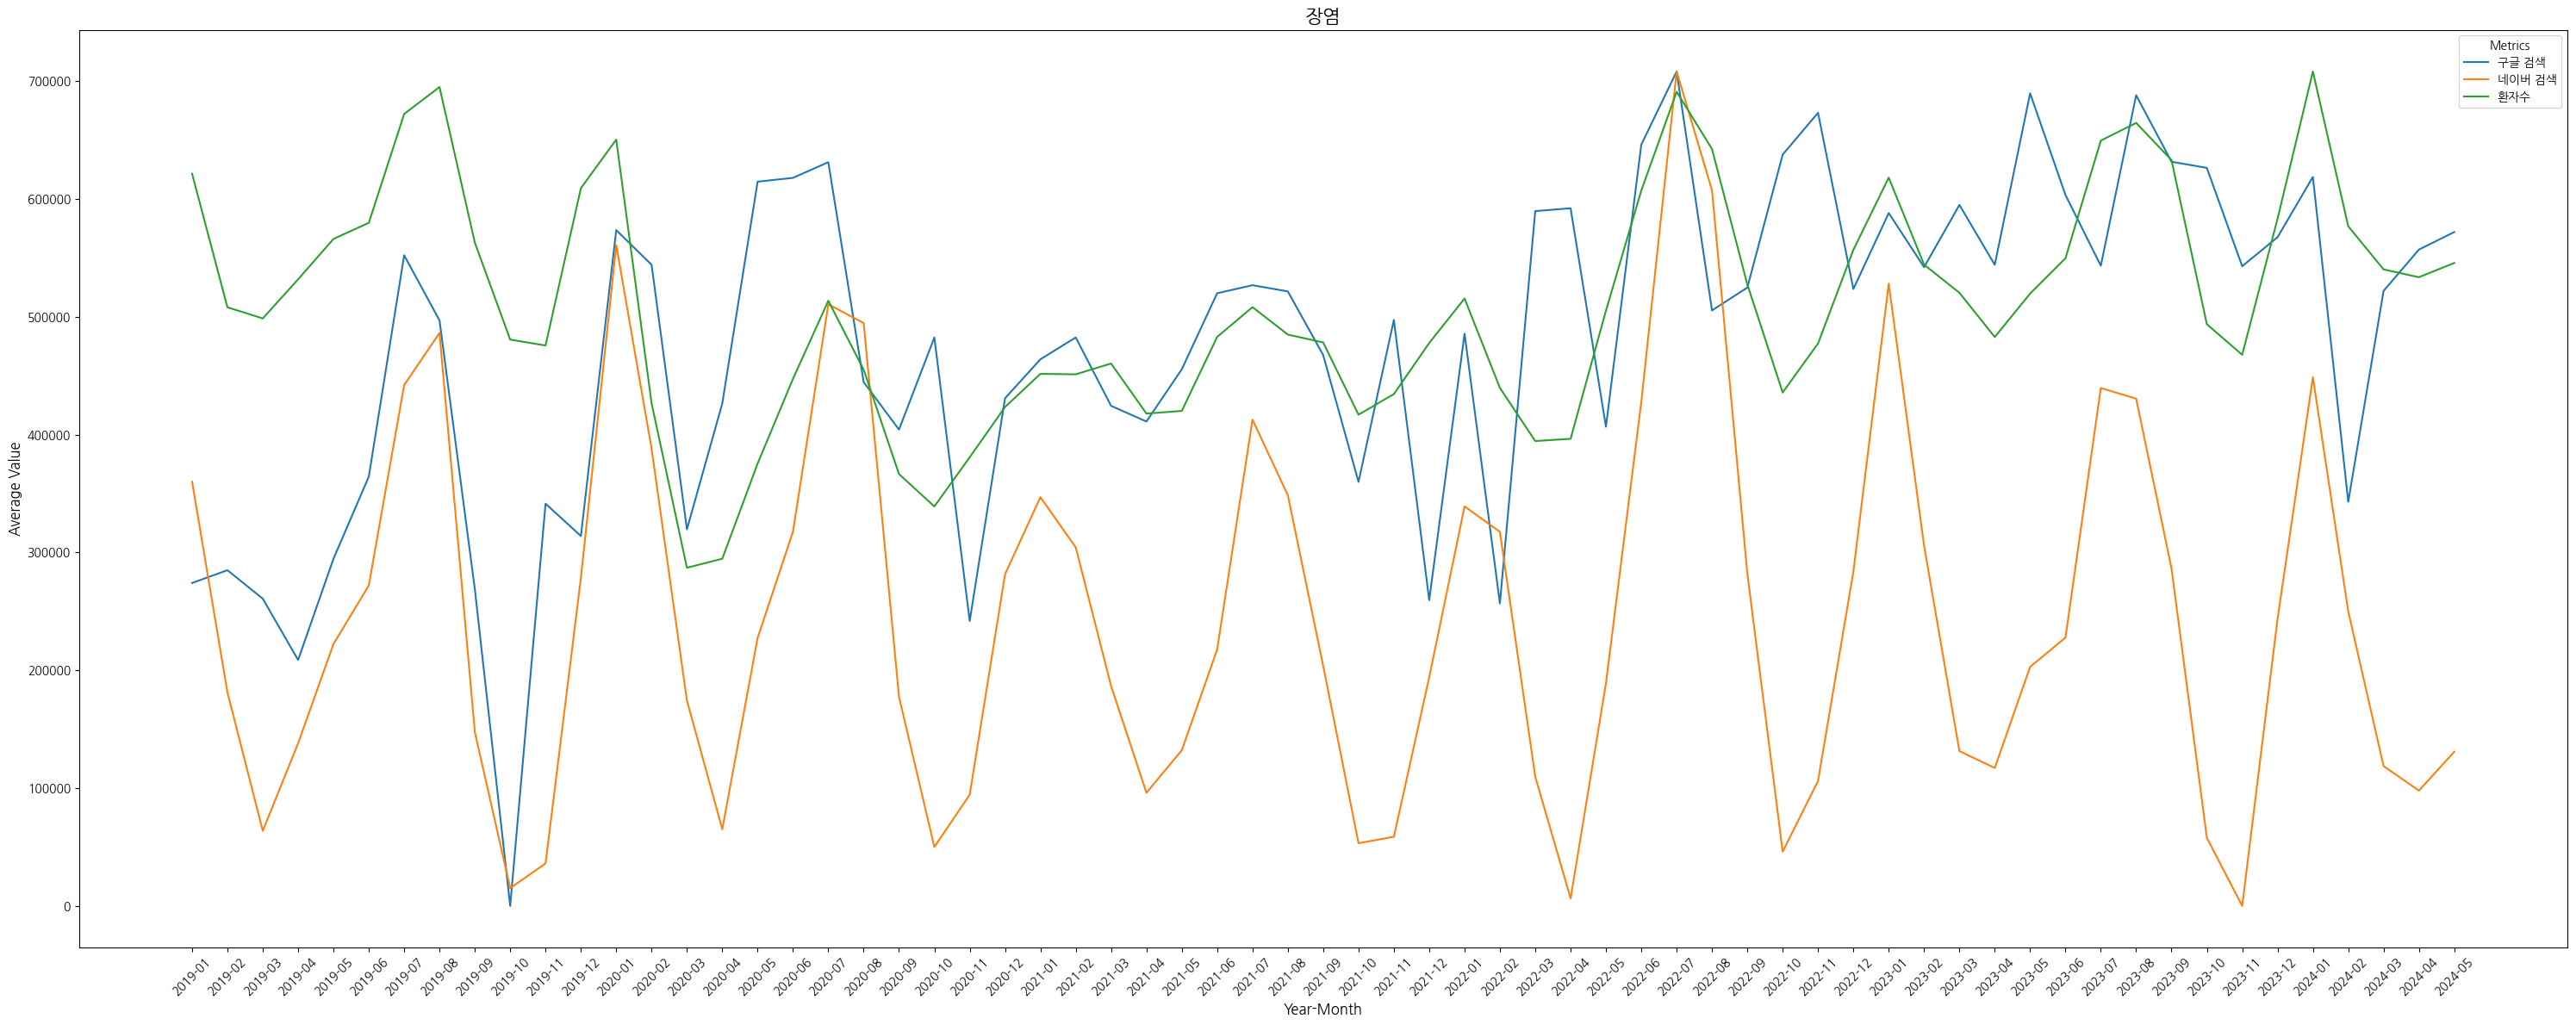

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(30, 12))
plt.plot(scaler_ndf.index.astype(str), scaler_gdf["gastroenteritis"], label=("구글 검색"))
plt.plot(scaler_ndf.index.astype(str), scaler_ndf["gastroenteritis"], label=("네이버 검색"))
plt.plot(scaler_pdf.index.astype(str), scaler_pdf["patient_count"], label=("환자수"))

plt.title("장염", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.legend(title="Metrics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

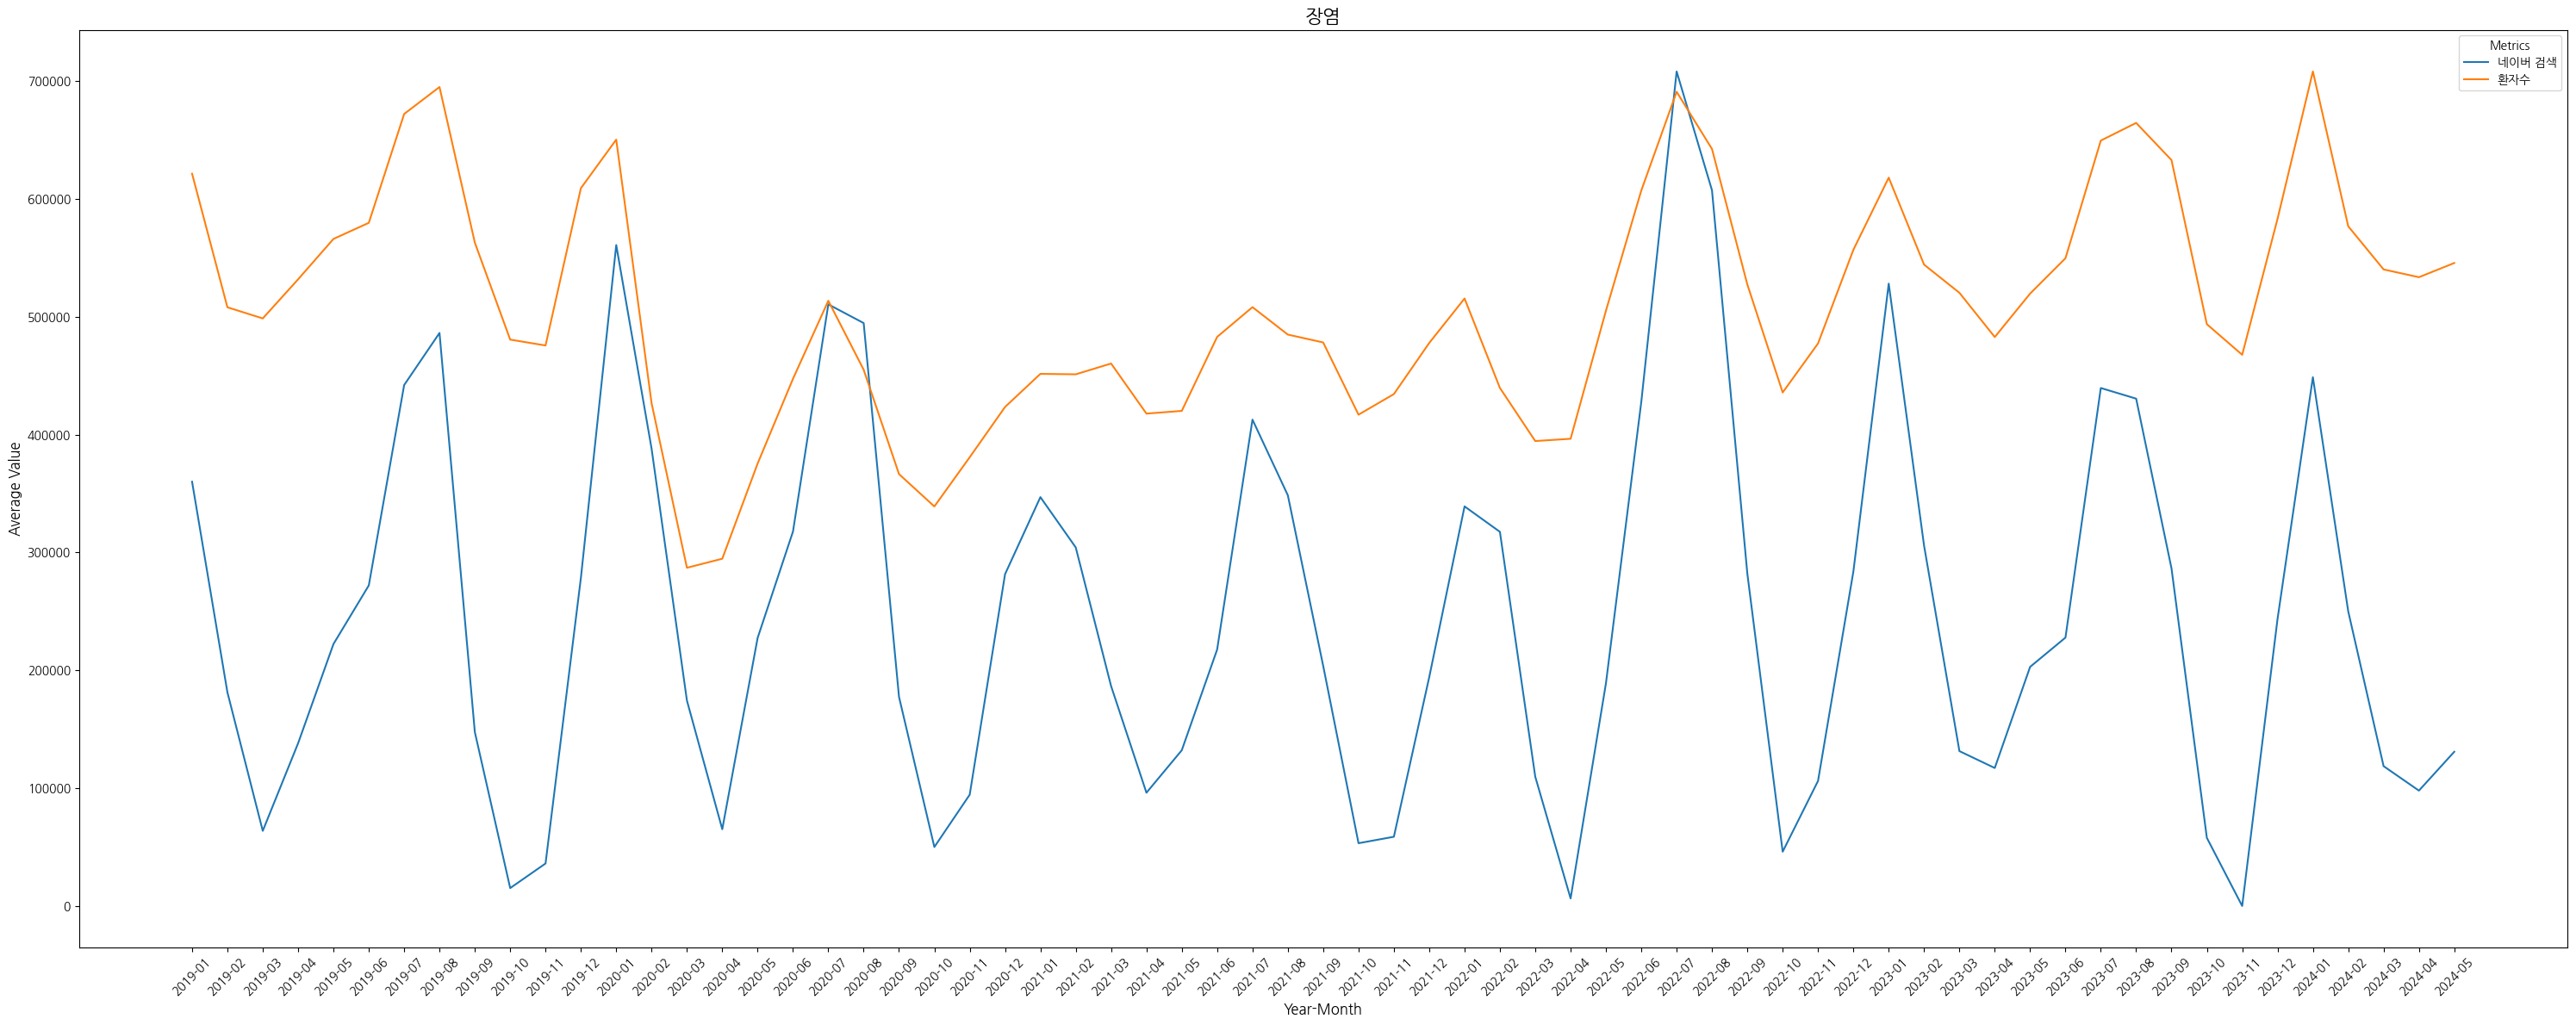

In [63]:
plt.figure(figsize=(30, 12))
plt.plot(scaler_ndf.index.astype(str), scaler_ndf["gastroenteritis"], label=("네이버 검색"))
plt.plot(scaler_pdf.index.astype(str), scaler_pdf["patient_count"], label=("환자수"))

plt.title("장염", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.legend(title="Metrics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

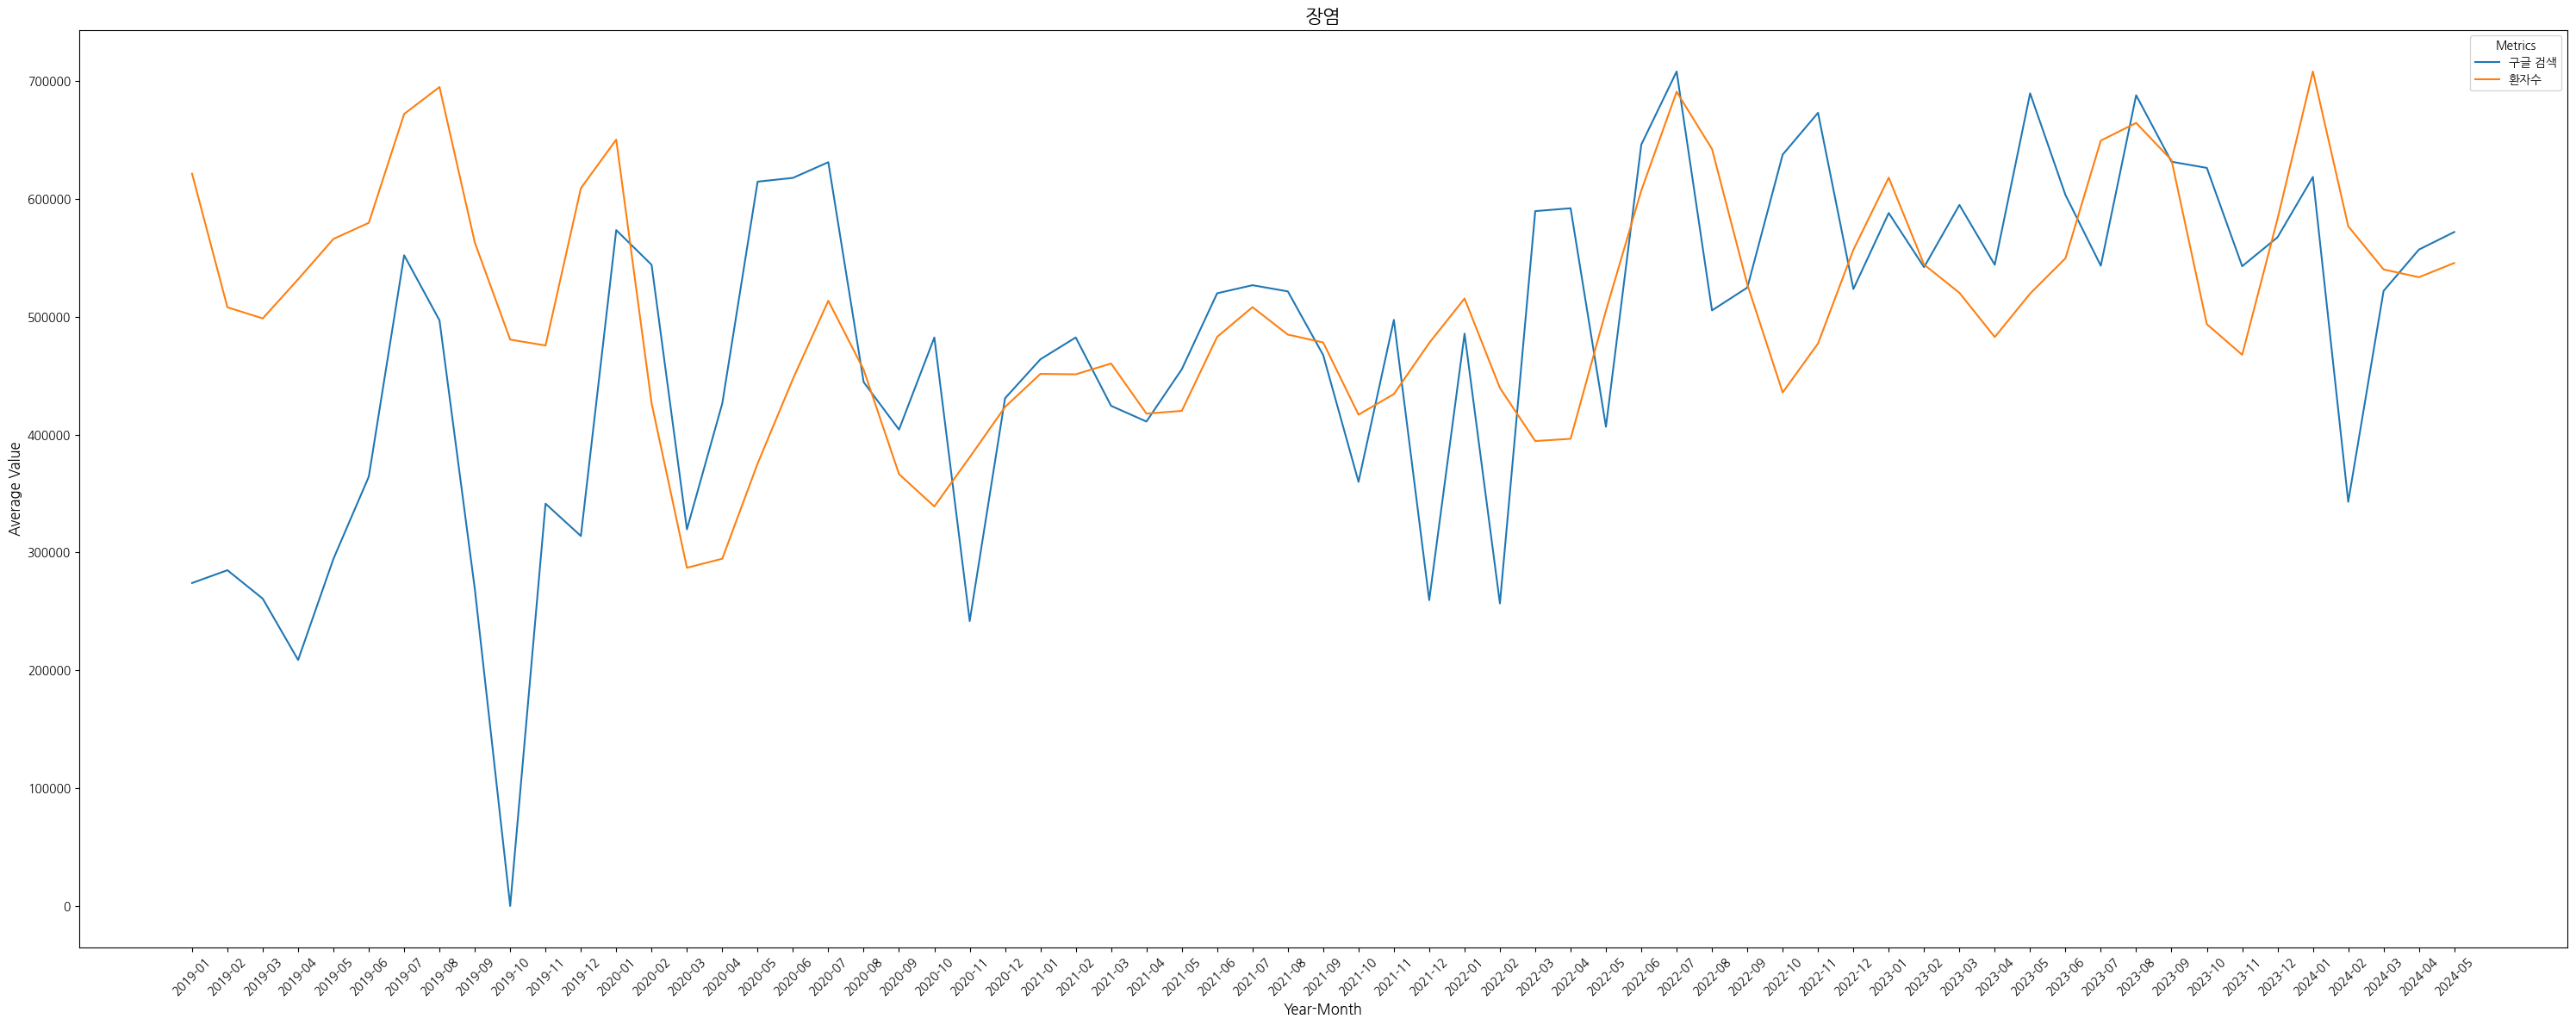

In [64]:
plt.figure(figsize=(30, 12))
plt.plot(scaler_ndf.index.astype(str), scaler_gdf["gastroenteritis"], label=("구글 검색"))
plt.plot(scaler_pdf.index.astype(str), scaler_pdf["patient_count"], label=("환자수"))

plt.title("장염", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.legend(title="Metrics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 분석결과
- 환자수와 네이버 트랜드는 상승폭이 상당히 유사하다
- 환자수와 구글 트랜드는 상승폭이 환자수와는 유사는 하지만 네이버보다는 유사하지 않는다.

In [151]:
conn = mysql.connector.connect(
    host = DB_HOST,
    user = DB_SUER,
    password = DB_PASSWORD,
    database = DB_NAME
)   

cursor = conn.cursor(buffered=True)

# SQL 쿼리 실행 및 데이터 불러오기
query = """
    SELECT
        gender,
        age_group_10,
        DATE_FORMAT(report_date, '%Y-%m') as report_date, 
        patient_count
    FROM 
        michelin.disease_age 
    where 
        category = "장염";
"""
age_pdf = pd.read_sql(query, conn)

# 연결 종료
conn.close()
age_pdf = age_pdf.reset_index()

/tmp/ipykernel_13683/664030696.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  age_pdf = pd.read_sql(query, conn)


In [105]:
age_pdf.head()

,index,gender,age_group_10,report_date,patient_count
0,0,계,계,2019-01,621383
1,1,남,소계,2019-01,292955
2,2,남,0_9세,2019-01,94009
3,3,남,10_19세,2019-01,39426
4,4,남,20_29세,2019-01,35207


In [152]:
# Pivot table 생성
age_pdf_pivot = age_pdf.pivot_table(
    index='report_date',
    columns='age_group_10',
    values='patient_count',
    aggfunc='sum',
    fill_value=0
)

# Reset index 및 report_date를 Period로 변환
age_pdf_pivot.reset_index(inplace=True)
age_pdf_pivot['report_date'] = pd.to_datetime(age_pdf_pivot['report_date']).dt.to_period('M')

age_pdf_pivot.set_index("report_date", inplace=True)

columns_to_drop = ['소계']
age_pdf_pivot.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print(age_pdf_pivot.head())


age_group_10    0_9세  10_19세  20_29세  30_39세  40_49세  50_59세  60_69세  70_79세  \
report_date                                                                    
2019-01       176358   74218   80700   76484   60929   57973   46274   32818   
2019-02       139632   60806   66867   62639   50831   46801   38323   28311   
2019-03       139365   68531   60587   55637   46073   45411   38812   29394   
2019-04       159063   78541   60966   57326   45694   45021   39186   30477   
2019-05       162135   85615   69083   61048   49900   48707   41447   31304   

age_group_10  80세이상       계  
report_date                  
2019-01       15768  621383  
2019-02       13935  508037  
2019-03       14883  498579  
2019-04       15627  531783  
2019-05       16900  566035  


In [154]:
max_value = age_pdf_pivot["계"].max()

max_row = age_pdf_pivot[age_pdf_pivot["계"] == max_value]

max_row.head()

age_group_10,0_9세,10_19세,20_29세,30_39세,40_49세,50_59세,60_69세,70_79세,80세이상,계
report_date,,,,,,,,,,
2024-01,159607,72451,94760,102511,81393,69311,66016,39830,22388,708131


In [123]:
age_pdf_pivot.index = age_pdf_pivot.index.to_timestamp()

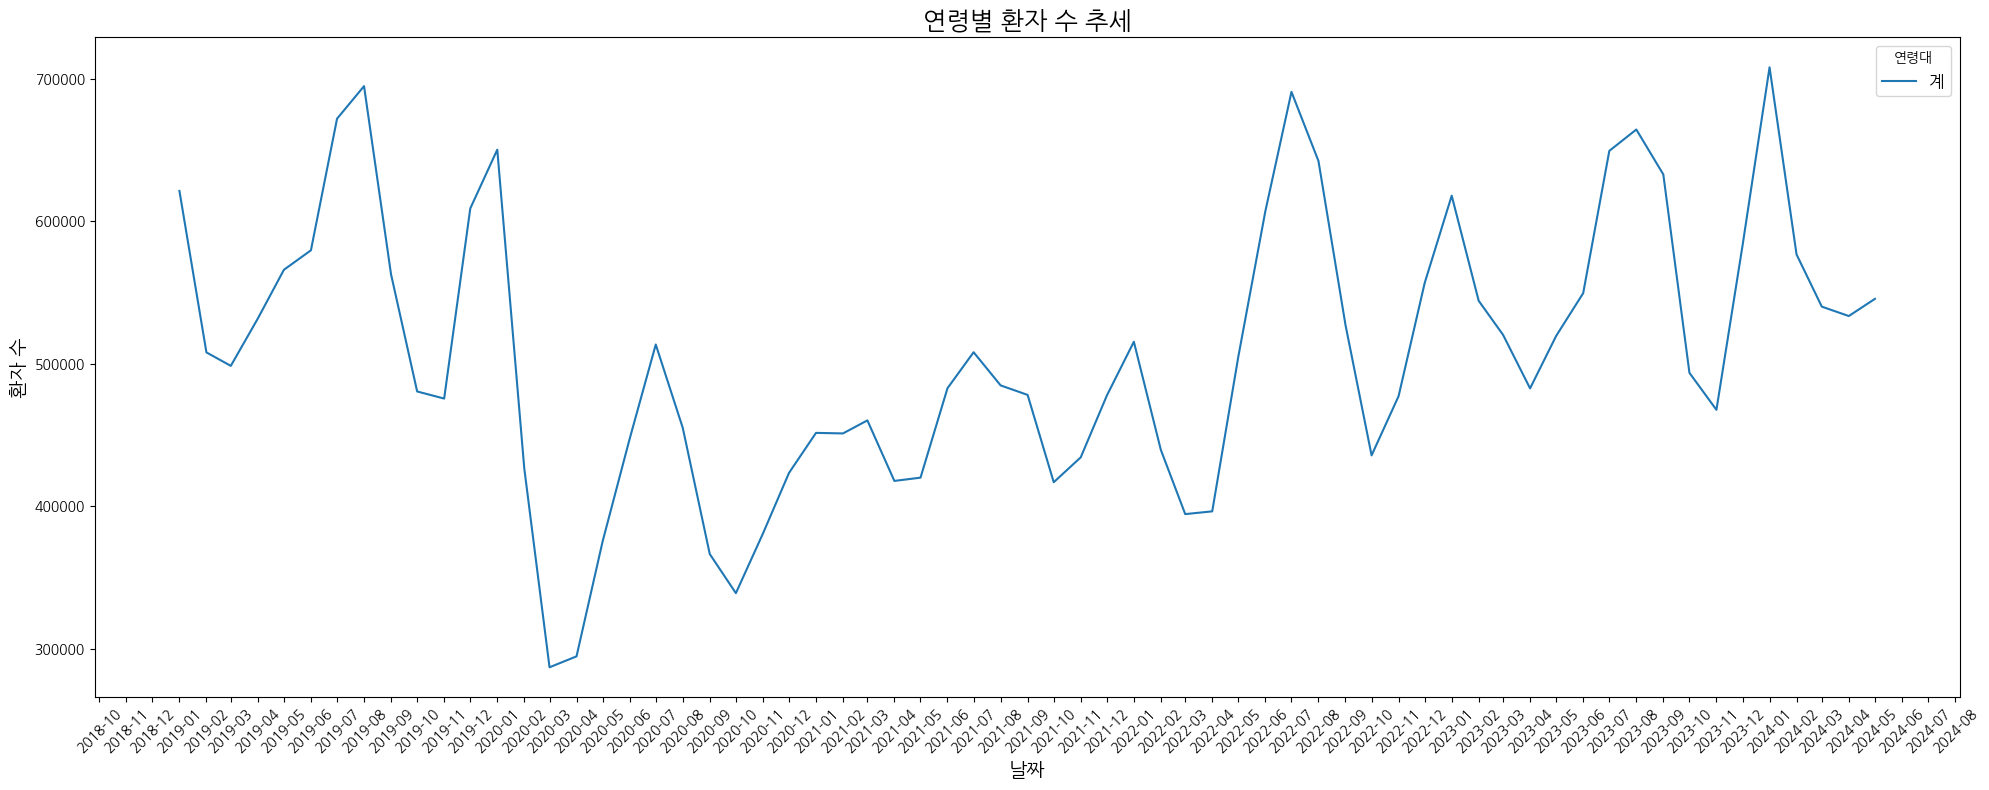

In [132]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(20, 8))
for age_group in age_pdf_pivot.columns[9]:
    plt.plot(age_pdf_pivot.index, age_pdf_pivot[age_group], label=age_group)

# Graph customization
plt.title("연령별 환자 수 추세", fontsize=18)
plt.xlabel("날짜", fontsize=14)
plt.ylabel("환자 수", fontsize=14)
plt.legend(title="연령대", fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 연-월 포맷 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 매월 표시
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


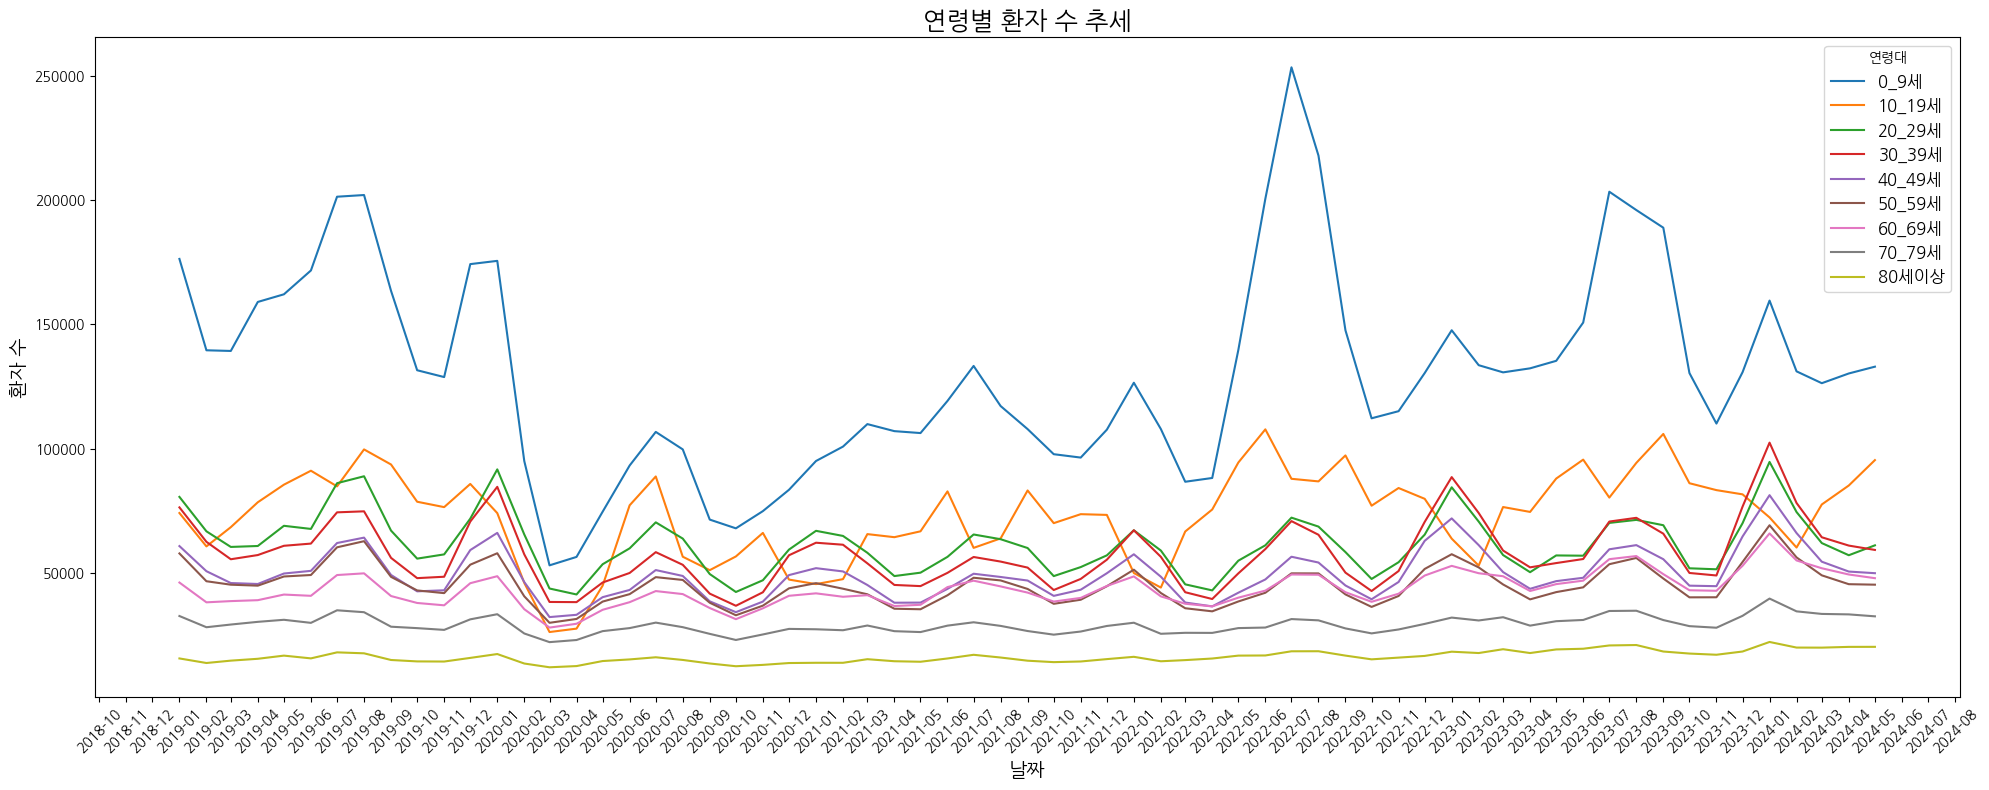

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
for age_group in age_pdf_pivot.columns[0:9]:
    plt.plot(age_pdf_pivot.index, age_pdf_pivot[age_group], label=age_group)

# Graph customization
plt.title("연령별 환자 수 추세", fontsize=18)
plt.xlabel("날짜", fontsize=14)
plt.ylabel("환자 수", fontsize=14)
plt.legend(title="연령대", fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 연-월 포맷 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 매월 표시
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [147]:
# 연령대 열만 선택 (계 제외)
age_columns = age_pdf_pivot.columns.drop(['계',"age_group_10","level_0",'index'], errors='ignore')

age_pdf_pivot.head()

age_group_10,level_0,index,report_date,0_9세,10_19세,20_29세,30_39세,40_49세,50_59세,60_69세,70_79세,80세이상,계
0,0,0,2019-01-01,176358,74218,80700,76484,60929,57973,46274,32818,15768,621383
1,1,1,2019-02-01,139632,60806,66867,62639,50831,46801,38323,28311,13935,508037
2,2,2,2019-03-01,139365,68531,60587,55637,46073,45411,38812,29394,14883,498579
3,3,3,2019-04-01,159063,78541,60966,57326,45694,45021,39186,30477,15627,531783
4,4,4,2019-05-01,162135,85615,69083,61048,49900,48707,41447,31304,16900,566035
